In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


In [2]:
# setting difference to be 4

df = pd.read_csv(r'Final5_csv.csv')
df.head()

,Unnamed: 0,coil,furnace Number,analyse,Hardness_1,Hardness_2,Width,Temperature before finishing mill,Temperature after finishing mill,Thickness,...,al,ma,b,n,ti,cr,va,mo,difference,constriction
0,0,396378,1,K371,10003,101,1302.1,1147,921,4.36,...,304,291,1,34,6,302,0,25,-0.783333,0
1,1,396376,3,K371,10123,101,1282.3,1150,920,4.37,...,395,384,1,33,12,189,25,7,-0.300000,0
2,2,396377,4,K321,10040,102,1297.4,1183,933,4.43,...,476,463,1,20,11,288,0,40,-1.866667,0
3,3,396379,3,K371,10243,102,1295.2,1165,910,4.44,...,306,296,1,21,9,253,0,9,-0.166667,0
4,4,396380,4,K321,10012,100,1293.3,1192,909,3.95,...,340,329,1,28,8,297,0,23,-0.800000,0


In [3]:
# drop column
df = df.drop(['Unnamed: 0','Thickness profile','difference'], axis = 1)

#df

In [4]:
df.columns

Index(['coil', 'furnace Number', 'analyse', 'Hardness_1', 'Hardness_2',
       'Width', 'Temperature before finishing mill',
       'Temperature after finishing mill', 'Thickness', 'c', 'mn', 'si', 'nb',
       'p', 's', 'al', 'ma', 'b', 'n', 'ti', 'cr', 'va', 'mo', 'constriction'],
      dtype='object')

In [5]:
#Extracting independent variable
X= df[['Width','Temperature before finishing mill','Temperature after finishing mill','Thickness','Hardness_2']].values

In [6]:
#Extracting dependent variable
y= df.iloc[:,-1].values 
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [7]:
#For splitting the dataset, 

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)  

In [8]:
# feature scaling 

from sklearn.preprocessing import StandardScaler 

# fitting  and transforming the training dataset.

st_x= StandardScaler()  
X_train= st_x.fit_transform(X_train)


In [9]:
# fitting  and transforming the test dataset
X_test= st_x.transform(X_test)

In [10]:
from sklearn.preprocessing import MinMaxScaler #fixed import

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Different Binary Classification Algorithms

In [11]:
#1  Naive Bayes

from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB().fit(X_train, y_train)
print("score on test: " + str(mnb.score(X_test, y_test)))
print("score on train: "+ str(mnb.score(X_train, y_train)))


#Applying prediction on tested dataset 
preds = mnb.predict(X_test)



#score on test: 0.9436973283127129
#score on train: 0.9412529418357055

# duration: 0.3s

score on test: 0.9436973283127129
score on train: 0.9412529418357055


C:\Users\masud\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


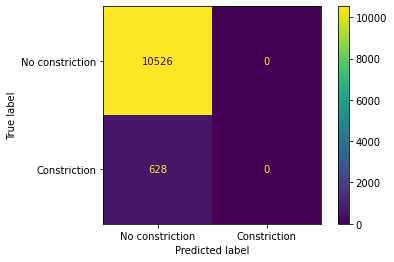

In [12]:
from sklearn import metrics

metrics.plot_confusion_matrix(mnb, X_test, y_test, display_labels=['No constriction', 'Constriction'])

In [13]:
f1_positive = metrics.f1_score(y_test, preds, pos_label=1)
f1_negative = metrics.f1_score(y_test, preds, pos_label=0)
f1_positive, f1_negative 

(0.0, 0.9710332103321033)

In [14]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10526
           1       0.00      0.00      0.00       628

    accuracy                           0.94     11154
   macro avg       0.47      0.50      0.49     11154
weighted avg       0.89      0.94      0.92     11154



C:\Users\masud\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masud\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masud\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [15]:
#2  Logistic Regression

from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(max_iter=100)
model = lr.fit(X_train, y_train)

print("score on test: " + str(lr.score(X_test, y_test)))
print("score on train: "+ str(lr.score(X_train, y_train)))

#Applying prediction on tested dataset 
pred2 = model.predict(X_test)

#score on test: 0.9436973283127129
#score on train: 0.9412529418357055

# duration: 0.5s

score on test: 0.9436973283127129
score on train: 0.9412529418357055


C:\Users\masud\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


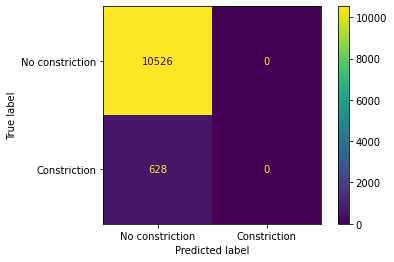

In [16]:
from sklearn import metrics

metrics.plot_confusion_matrix(model, X_test, y_test, display_labels=['No constriction', 'Constriction'])

In [17]:
print(metrics.classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10526
           1       0.00      0.00      0.00       628

    accuracy                           0.94     11154
   macro avg       0.47      0.50      0.49     11154
weighted avg       0.89      0.94      0.92     11154



C:\Users\masud\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masud\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masud\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [18]:
# K-Nearest Neighbours

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
model2 = knn.fit(X_train, y_train)
print("train shape: " + str(X_train.shape))
print("score on test: " + str(knn.score(X_test, y_test)))
print("score on train: "+ str(knn.score(X_train, y_train)))

pred3 = model2.predict(X_test)

#train shape: (44615, 6)
#score on test: 0.9436973283127129
#score on train: 0.9528858007396616

#durations: 2m 36.9s


train shape: (44615, 5)
score on test: 0.9436973283127129
score on train: 0.9528858007396616


C:\Users\masud\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


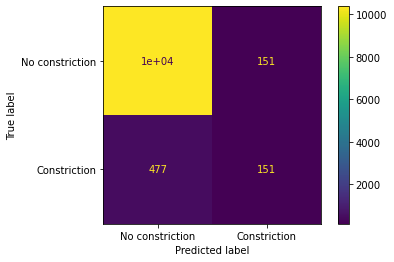

In [19]:
metrics.plot_confusion_matrix(model2, X_test, y_test, display_labels=['No constriction', 'Constriction'])

In [20]:
print(metrics.classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10526
           1       0.50      0.24      0.32       628

    accuracy                           0.94     11154
   macro avg       0.73      0.61      0.65     11154
weighted avg       0.93      0.94      0.93     11154



In [21]:
# Support Vector Machine

from sklearn.svm import LinearSVC

svm=LinearSVC(C=0.0001)
model_svm= svm.fit(X_train, y_train)
print("score on test: " + str(svm.score(X_test, y_test)))
print("score on train: "+ str(svm.score(X_train, y_train)))


pred_svm =model_svm.predict(X_test)

#score on test: 0.9436973283127129
#score on train: 0.9412529418357055

#duration 0.6s

score on test: 0.9436973283127129
score on train: 0.9412529418357055


C:\Users\masud\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


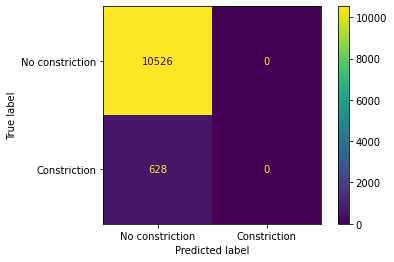

In [22]:
metrics.plot_confusion_matrix(model_svm, X_test, y_test, display_labels=['No constriction', 'Constriction'])

In [23]:
print(metrics.classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10526
           1       0.00      0.00      0.00       628

    accuracy                           0.94     11154
   macro avg       0.47      0.50      0.49     11154
weighted avg       0.89      0.94      0.92     11154



C:\Users\masud\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masud\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\masud\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [24]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
model_clf = clf.fit(X_train, y_train)
print("score on test: "  + str(clf.score(X_test, y_test)))
print("score on train: " + str(clf.score(X_train, y_train)))

#applying nodel on test dataset
pred_clf = model_clf.predict(X_test)

#score on test: 0.915277030661646
#score on train: 0.9998431020957077

#durations: 0.1s


score on test: 0.915277030661646
score on train: 0.9998431020957077


C:\Users\masud\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


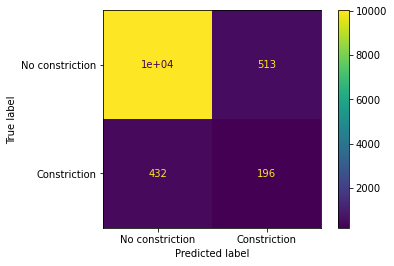

In [25]:
metrics.plot_confusion_matrix(model_clf, X_test, y_test, display_labels=['No constriction', 'Constriction'])

In [26]:
print(metrics.classification_report(y_test,pred_clf))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     10526
           1       0.28      0.31      0.29       628

    accuracy                           0.92     11154
   macro avg       0.62      0.63      0.62     11154
weighted avg       0.92      0.92      0.92     11154



In [27]:
# Bagging Decision Tree (Ensemble Learning I)

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K 
# n_estimators: number of decision trees 

bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
model_bg = bg.fit(X_train, y_train)
print("score on test: " + str(bg.score(X_test, y_test)))
print("score on train: "+ str(bg.score(X_train, y_train)))

#applying nodel on test dataset
pred_bg = model_bg.predict(X_test)

#score on test: 0.9454007530930608
#score on train: 0.9716238933094251

# duration 0.7s

#The Bagging Classifier is much slower as it basically runs 10 decision trees 
# but one can see a reduction of the overfitting we saw on the single Decision 
# Tree and an increase in the test score

score on test: 0.9454007530930608
score on train: 0.9716238933094251


C:\Users\masud\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


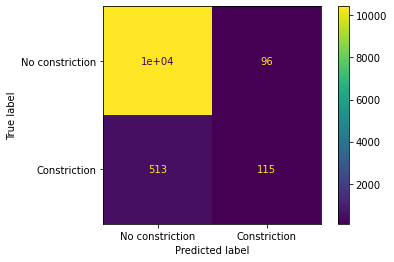

In [28]:
metrics.plot_confusion_matrix(model_bg, X_test, y_test, display_labels=['No constriction', 'Constriction'])

In [29]:
print(metrics.classification_report(y_test,pred_bg))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10526
           1       0.55      0.18      0.27       628

    accuracy                           0.95     11154
   macro avg       0.75      0.59      0.62     11154
weighted avg       0.93      0.95      0.93     11154



In [30]:
#  Boosting Decision Tree (Ensemble Learning II)

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
model_adb = adb.fit(X_train, y_train)

print("score on test: " + str(adb.score(X_test, y_test)))
print("score on train: "+ str(adb.score(X_train, y_train)))

pred_adb = model_adb.predict(X_test)


#score on test: 0.9454904070288686
#score on train: 0.9438753782360193

#duration 0.7s

score on test: 0.9454904070288686
score on train: 0.9438753782360193


C:\Users\masud\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


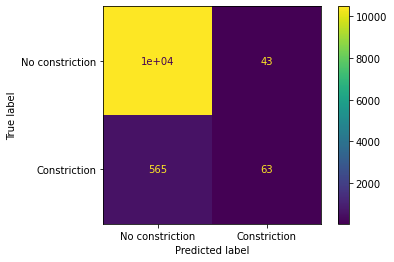

In [31]:
metrics.plot_confusion_matrix(model_adb, X_test, y_test, display_labels=['No constriction', 'Constriction'])

In [32]:
print(metrics.classification_report(y_test,pred_adb))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     10526
           1       0.59      0.10      0.17       628

    accuracy                           0.95     11154
   macro avg       0.77      0.55      0.57     11154
weighted avg       0.93      0.95      0.93     11154



In [33]:
# Random Forest (Ensemble Learning III)

from sklearn.ensemble import RandomForestClassifier

# n_estimators = number of decision trees
rf = RandomForestClassifier(n_estimators=30, max_depth=9)
model_rf = rf.fit(X_train, y_train)
print("score on test: " + str(rf.score(X_test, y_test)))
print("score on train: "+ str(rf.score(X_train, y_train)))

pred_rf = model_rf.predict(X_test)

#score on test: 0.9483593329747176
#score on train: 0.9486271433374426

#duration 1.2s

score on test: 0.9483593329747176
score on train: 0.9486271433374426


C:\Users\masud\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


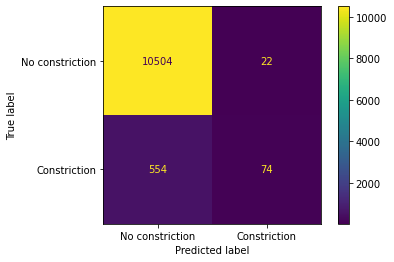

In [34]:
metrics.plot_confusion_matrix(model_rf, X_test, y_test, display_labels=['No constriction', 'Constriction'])

In [35]:
print(metrics.classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     10526
           1       0.77      0.12      0.20       628

    accuracy                           0.95     11154
   macro avg       0.86      0.56      0.59     11154
weighted avg       0.94      0.95      0.93     11154



In [36]:
#Neural Network (Deep Learning)

from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics

# split an additional validation dataset
x_validation=X_train[:1000]
x_partial_train=X_train[1000:]
y_validation=y_train[:1000]
y_partial_train=y_train[1000:]

model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(6,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_partial_train,y_partial_train,epochs=4,batch_size=512,validation_data=(x_validation,y_validation))
print("score on test: " + str(model.evaluate(X_test,y_test)[1]))
print("score on train: "+ str(model.evaluate(X_train,y_train)[1]))

Epoch 1/4


ValueError: in user code:

    File "C:\Users\masud\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\masud\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\masud\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\masud\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\masud\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\masud\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 6), found shape=(None, 5)


In [ ]:
from keras import regularizers

# add validation dataset
validation_split=1000
x_validation=X_train[:validation_split]
x_partial_train=X_train[validation_split:]
y_validation=y_train[:validation_split]
y_partial_train=y_train[validation_split:]
model=models.Sequential()
model.add(layers.Dense(8,kernel_regularizer=regularizers.l2(0.003),activation='relu',input_shape=(6,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(8,kernel_regularizer=regularizers.l2(0.003),activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_partial_train,y_partial_train,epochs=4,batch_size=512,validation_data=(x_validation,y_validation))
print("score on test: " + str(model.evaluate(X_test,y_test)[1]))
print("score on train: "+ str(model.evaluate(X_train,y_train)[1]))

Epoch 1/4
86/86 [==============================] - 1s 4ms/step - loss: 0.6944 - accuracy: 0.7017 - val_loss: 0.5804 - val_accuracy: 0.9180
Epoch 2/4
86/86 [==============================] - 0s 3ms/step - loss: 0.5247 - accuracy: 0.9033 - val_loss: 0.3986 - val_accuracy: 0.9180
Epoch 3/4
86/86 [==============================] - 0s 3ms/step - loss: 0.4368 - accuracy: 0.9115 - val_loss: 0.3257 - val_accuracy: 0.9180
Epoch 4/4
349/349 [==============================] - 0s 1ms/step - loss: 0.3138 - accuracy: 0.9153
score on test: 0.9152770042419434
1395/1395 [==============================] - 1s 1ms/step - loss: 0.3210 - accuracy: 0.9117
score on train: 0.9116888642311096
